# 

## <div align="center">Analysis and Segmentation of Albotherm’s Market Potential in Commercial Buildings</div>

## Introduction
Albotherm offers innovative smart glass coating technology for commercial buildings, transitioning from transparent to white as temperatures rise, reducing the need for electrical cooling. 

-   This analysis will explore the market potential for Albotherm within the multiple sectors, focusing on energy savings,     
    sustainability benefits, and the broader impact on reducing carbon emissions.

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


###  Collected data from 33 companies.(Researched companies)

## Data 

In [2]:
data=pd.read_csv('analysis.csv')

In [3]:
data.head()

,COMPANY NAME,EST. YEAR,INDUSTRY,CORE SERVICES,LOCATION,MARKET PRESENCE,WEBSITE,INFRASTRUCTURE,RESIDENDIAL,AUTOMOTIVE,EDU/Cultural,COMMERCIAL,CATEGORY,PARTNERSHIPS,SEGMENT
0,John Perkins Construction Ltd,1985,Construction,General,UK,Regional,https://www.johnperkins.co.uk/,0,1,0,0,1,Builder,Construction & Infrastructure,Office Windows
1,VINCI Construction UK Limited,1920,Construction,Buildings,UK,International,https://uk.vinci-construction.com/,1,0,0,0,1,Builder,Construction & Infrastructure,Glass Facades
2,Southwest Contractors Ltd,1995,Construction,Residential,UK,Local,https://www.swcontractorsbristol.co.uk/,0,1,0,0,0,Builder,Construction & Infrastructure,Office Windows
3,Oakland Construction,1980,Construction,Commercial,UK,Regional,https://www.oaklandconstruction.co.uk/,0,0,0,0,1,Builder,Construction & Infrastructure,Glass Facades
4,HG construction,1990,Construction,High-end,UK,National,https://www.hgconstruction.co.uk/,0,1,0,0,1,Builder,Construction & Infrastructure,Office Windows


In [4]:
data.shape

(32, 15)

## Data Cleaning 

In [5]:
data.isnull().sum()

COMPANY NAME       0
EST. YEAR          0
INDUSTRY           0
CORE SERVICES      0
LOCATION           0
MARKET PRESENCE    0
WEBSITE            0
INFRASTRUCTURE     0
RESIDENDIAL        0
AUTOMOTIVE         0
EDU/Cultural       0
COMMERCIAL         0
CATEGORY           0
PARTNERSHIPS       0
SEGMENT            0
dtype: int64

In [6]:
data.dtypes

COMPANY NAME       object
EST. YEAR           int64
INDUSTRY           object
CORE SERVICES      object
LOCATION           object
MARKET PRESENCE    object
WEBSITE            object
INFRASTRUCTURE      int64
RESIDENDIAL         int64
AUTOMOTIVE          int64
EDU/Cultural        int64
COMMERCIAL          int64
CATEGORY           object
PARTNERSHIPS       object
SEGMENT            object
dtype: object

## Dropping unwanted columns 

In [7]:
data = data.drop('WEBSITE', axis=1)

In [8]:
#data.head()

## EDA 

In [9]:
print(data.describe())

         EST. YEAR  INFRASTRUCTURE  RESIDENDIAL  AUTOMOTIVE  EDU/Cultural  \
count    32.000000       32.000000    32.000000   32.000000     32.000000   
mean   1961.125000        0.218750     0.500000    0.218750      0.156250   
std      72.024078        0.420013     0.508001    0.420013      0.368902   
min    1665.000000        0.000000     0.000000    0.000000      0.000000   
25%    1952.000000        0.000000     0.000000    0.000000      0.000000   
50%    1988.500000        0.000000     0.500000    0.000000      0.000000   
75%    2000.000000        0.000000     1.000000    0.000000      0.000000   
max    2015.000000        1.000000     1.000000    1.000000      1.000000   

       COMMERCIAL  
count   32.000000  
mean     0.781250  
std      0.420013  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


## 1. Market Presence Analysis:

In [10]:
print(data['MARKET PRESENCE'].value_counts()) ## TOTAL COUNT

MARKET PRESENCE
National         17
International    12
Regional          2
Local             1
Name: count, dtype: int64


## 2. Core Services Analysis:

In [11]:
print(data[['INFRASTRUCTURE', 'RESIDENDIAL', 'EDU/Cultural','COMMERCIAL']].sum())

INFRASTRUCTURE     7
RESIDENDIAL       16
EDU/Cultural       5
COMMERCIAL        25
dtype: int64


-  Most companies offer general core services in construction, with a few specializing in specific areas such as buildings, residential, etc..

-  Majority of companies are engaged in the commercial sector, followed by residential and infrastructure projects.

In [12]:
# Identify Key Variables
key_variables = ['INDUSTRY', 'CORE SERVICES', 'LOCATION', 'MARKET PRESENCE', 'SEGMENT']

## 3. Visualization of Companies Across Segments:

In [13]:
# Segmentation Criteria
segmentation_column = 'SEGMENT'

In [14]:
# Segmentation Analysis
segmented_data = data.groupby(segmentation_column).size().reset_index(name='Count')

In [15]:
segmented_data

,SEGMENT,Count
0,Glass Facades,23
1,Office Windows,5
2,Skylights,4


#### Visualisations for better understandings

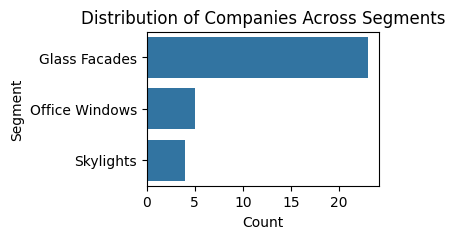

In [16]:
# Step 5: Visualize the Segments
plt.figure(figsize=(3,2))
sns.barplot(x='Count', y=segmentation_column, data=segmented_data, orient='h')
plt.title('Distribution of Companies Across Segments')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.show()

-  Majority of companies operate in Glass Facades segment (commercial buildings e.g. offices or conference centres), with fewer in Office Windows and Skylights (for industrial warehouses).

## 4. Segmentation Analysis by Industry:

In [17]:
# Columns for market presence evaluation
market_presence_columns = ['INFRASTRUCTURE', 'RESIDENDIAL', 'AUTOMOTIVE', 'EDU/Cultural', 'COMMERCIAL']
market_presence_data = data[['COMPANY NAME'] + market_presence_columns]

# Displaying the extracted data
print(market_presence_data.head())

                    COMPANY NAME  INFRASTRUCTURE  RESIDENDIAL  AUTOMOTIVE  \
0  John Perkins Construction Ltd               0            1           0   
1  VINCI Construction UK Limited               1            0           0   
2      Southwest Contractors Ltd               0            1           0   
3           Oakland Construction               0            0           0   
4               HG construction                0            1           0   

   EDU/Cultural  COMMERCIAL  
0             0           1  
1             0           1  
2             0           0  
3             0           1  
4             0           1  


- Majority of companies in all segments belong to the Construction industry, focusing on various core services.

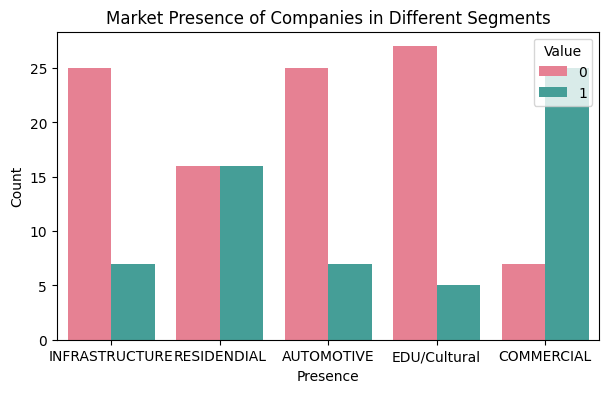

In [18]:
# Visualizing market presence based on different factors
plt.figure(figsize=(7,4))
sns.countplot(data=pd.melt(market_presence_data, id_vars='COMPANY NAME', var_name='Presence', value_name='Value'), 
              x='Presence', hue='Value', palette='husl')
plt.title('Market Presence of Companies in Different Segments')
plt.xlabel('Presence')
plt.ylabel('Count')
plt.legend(title='Value', loc='upper right', labels=['0', '1'])
plt.show()

- Companies across segments offer diverse core services, with a focus on construction and infrastructure.

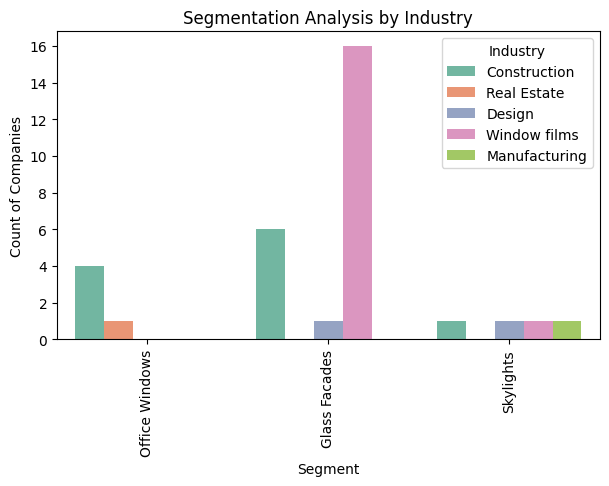

In [19]:
# Segmentation Analysis by Industry
plt.figure(figsize=(7,4))
sns.countplot(data=data, x='SEGMENT', hue='INDUSTRY', palette='Set2')
plt.title('Segmentation Analysis by Industry')
plt.xlabel('Segment')
plt.ylabel('Count of Companies')
plt.xticks(rotation=90)
plt.legend(title='Industry')
plt.show()

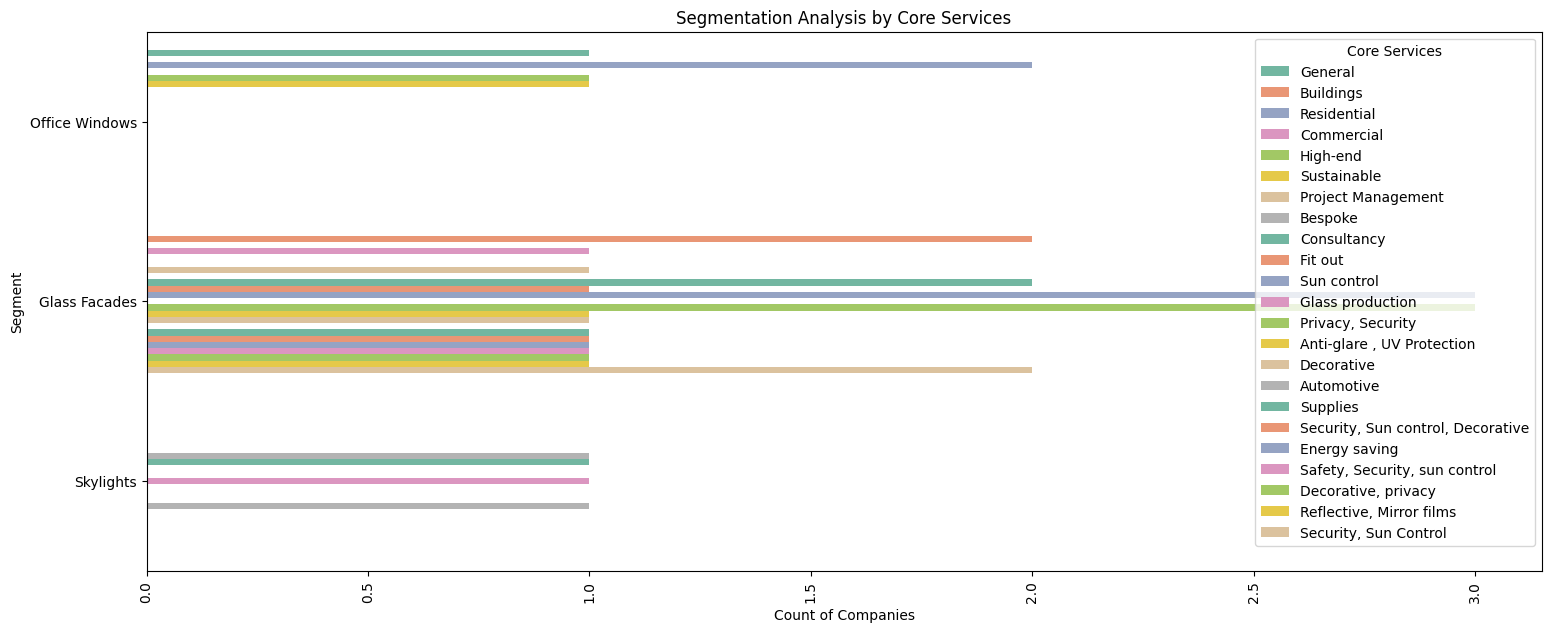

In [20]:
# Segmentation Analysis by Core Services
plt.figure(figsize=( 18,7))
sns.countplot(data=data, y='SEGMENT', hue='CORE SERVICES', palette='Set2')
plt.title('Segmentation Analysis by Core Services')
plt.ylabel('Segment')
plt.xlabel('Count of Companies')
plt.xticks(rotation=90)
plt.legend(title='Core Services')
plt.show()

## 5. Establishment Year Distribution:

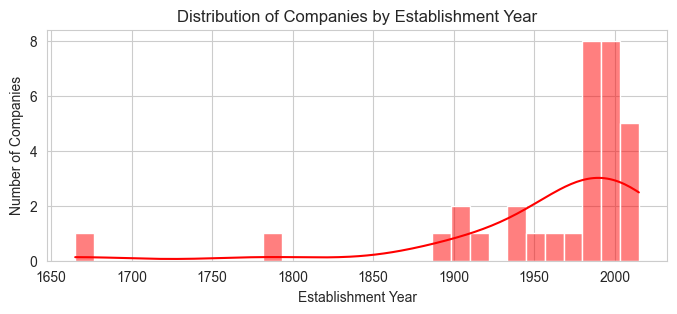

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

## Distribution of Companies by Establishment Year
plt.figure(figsize=(8,3))
sns.histplot(data['EST. YEAR'], bins=30, kde=True, color="red")
plt.title('Distribution of Companies by Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Number of Companies')
plt.show()                 ## peaks indicating specific years when more companies were founded

- Distribution of establishment years indicates peaks in specific years, suggesting periods of increased company founding.

## 6. Industry Area Distribution:

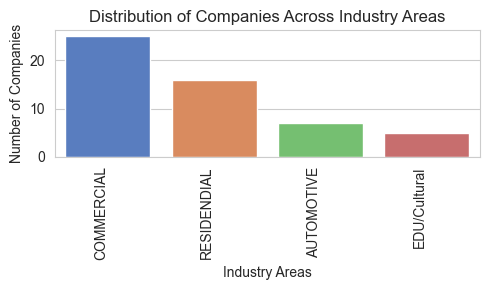

In [22]:
# Filter the data for relevant columns
industry_data = data[['COMPANY NAME', 'COMMERCIAL', 'RESIDENDIAL', 'AUTOMOTIVE', 'EDU/Cultural']]

# Set the 'COMPANY NAME' column as the index
industry_data.set_index('COMPANY NAME', inplace=True)

# Calculate the count of companies in each industry area
industry_counts = industry_data.sum()

# Plotting
plt.figure(figsize=(5,3))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="muted")
plt.title('Distribution of Companies Across Industry Areas')
plt.xlabel('Industry Areas')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## 7. Unique Count of Industry Data Across Companies:

- Heatmap showcasing the engagement of companies across different industry sectors. 

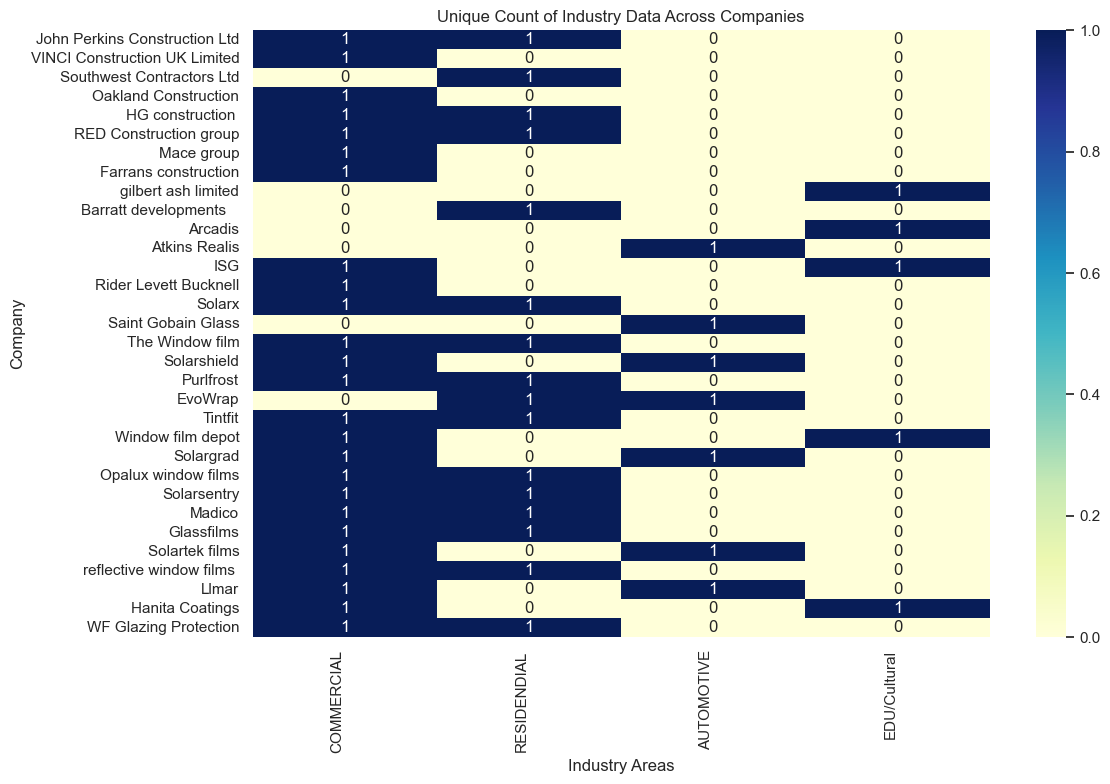

In [23]:
# Set the style of the heatmap
sns.set(style="whitegrid")

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(industry_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Unique Count of Industry Data Across Companies')
plt.xlabel('Industry Areas')
plt.ylabel('Company')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

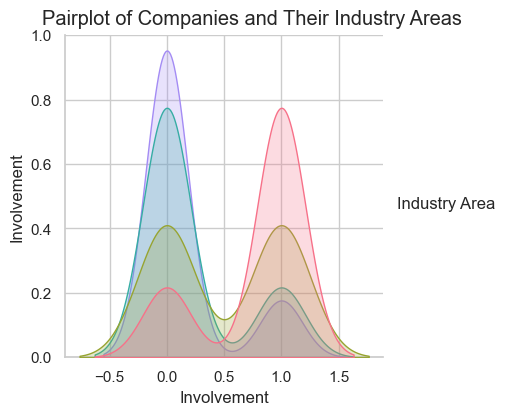

In [24]:
# Reset the index to convert the 'COMPANY NAME' column to a regular column
industry_data.reset_index(inplace=True)

# Rename the column to ensure it matches exactly
industry_data.rename(columns={'COMPANY NAME': 'Company'}, inplace=True)

# Melt the dataframe to convert it to long format
melted_data = pd.melt(industry_data, id_vars='Company', var_name='Industry Area', value_name='Involvement')

# Plotting the pairplot
sns.pairplot(melted_data, hue='Industry Area', palette='husl', height=4)
plt.suptitle('Pairplot of Companies and Their Industry Areas', y=1.02)
plt.show()


## Market Segmentation:
- To analyze and segment Albotherm's market potential in commercial buildings, we'll consider factors such as industry trends,  
  competitor landscape, and potential customer needs within this sector. This analysis can help identify strategic opportunities 
  for Albotherm and how they can differentiate their offerings.

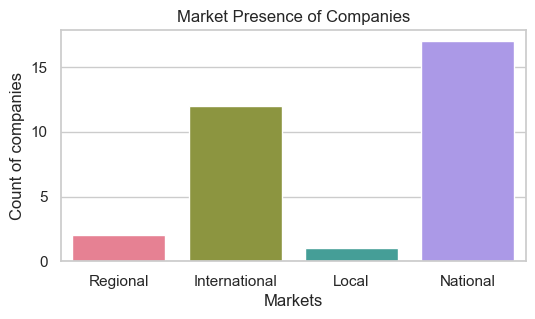

In [25]:
## Market Presence Analysis
plt.figure(figsize=(6, 3))
sns.countplot(data=data, x='MARKET PRESENCE', palette="husl")
plt.title('Market Presence of Companies')
plt.xlabel('Markets')
plt.ylabel('Count of companies')
plt.show()

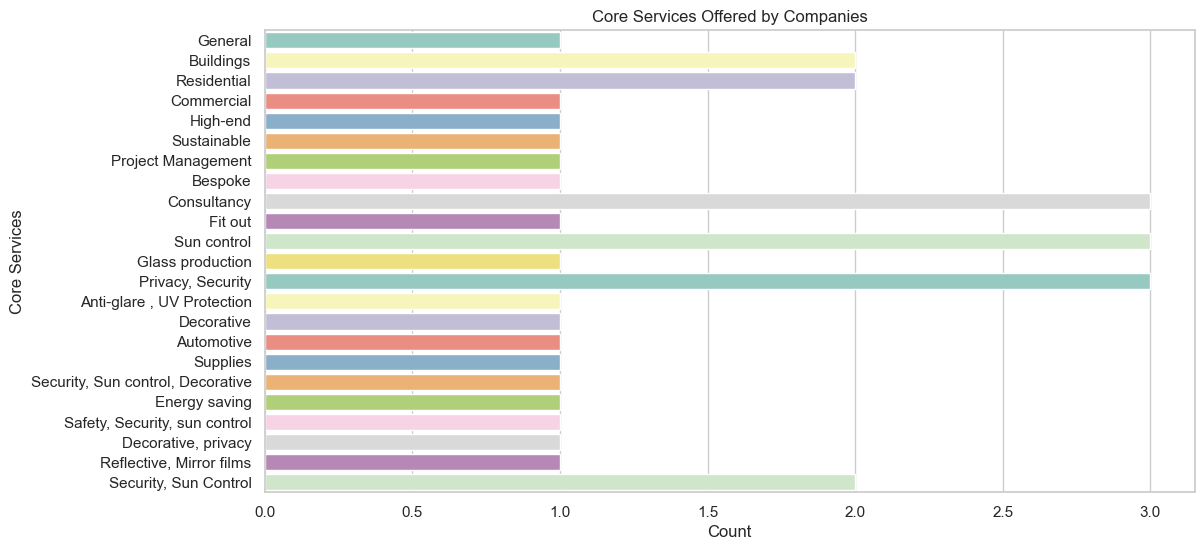

In [26]:
## Core Services Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='CORE SERVICES', palette="Set3")
plt.title('Core Services Offered by Companies')
plt.xlabel('Count')
plt.ylabel('Core Services')
plt.show()

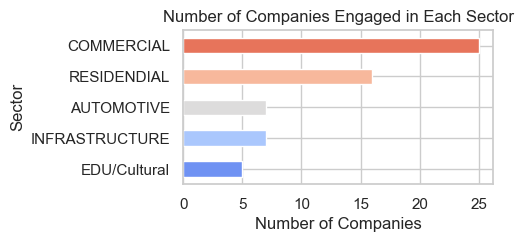

In [27]:
## Sector Engagement
sectors = ['INFRASTRUCTURE', 'RESIDENDIAL', 'AUTOMOTIVE', 'EDU/Cultural', 'COMMERCIAL']
sector_engagement = data[sectors].sum().sort_values()

plt.figure(figsize=(4, 2))
sector_engagement.plot(kind='barh', color=sns.color_palette("coolwarm", len(sectors)))
plt.title('Number of Companies Engaged in Each Sector')
plt.xlabel('Number of Companies')
plt.ylabel('Sector')
plt.show()

In [28]:
# Filter for companies involved in the 'COMMERCIAL' sector
commercial_sector_companies = data[data['COMMERCIAL'] == 1]

# Further filter these companies based on market presence to prioritize national and international companies
priority_commercial_companies = commercial_sector_companies[commercial_sector_companies['MARKET PRESENCE'].isin(['National', 'International'])]

# Selecting relevant columns to focus on potential leads
priority_leads = priority_commercial_companies[['COMPANY NAME', 'EST. YEAR', 'MARKET PRESENCE', 'LOCATION', 'CORE SERVICES']]

# Sorting these companies by establishment year to mix both well-established and newer companies that might be innovative
sorted_priority_leads = priority_leads.sort_values(by='EST. YEAR')

sorted_priority_leads


,COMPANY NAME,EST. YEAR,MARKET PRESENCE,LOCATION,CORE SERVICES
13,Rider Levett Bucknell,1785,International,UK,Consultancy
25,Madico,1903,International,USA,"Safety, Security, sun control"
1,VINCI Construction UK Limited,1920,International,UK,Buildings
7,Farrans construction,1940,National,Northern Ireland,Buildings
29,Llmar,1956,International,USA,"Privacy, Security"
23,Opalux window films,1976,National,UK,Sun control
30,Hanita Coatings,1982,International,Israel,"Security, Sun Control"
22,Solargrad,1987,International,USA,Energy saving
27,Solartek films,1988,National,UK,"Privacy, Security"
12,ISG,1989,International,UK,Fit out


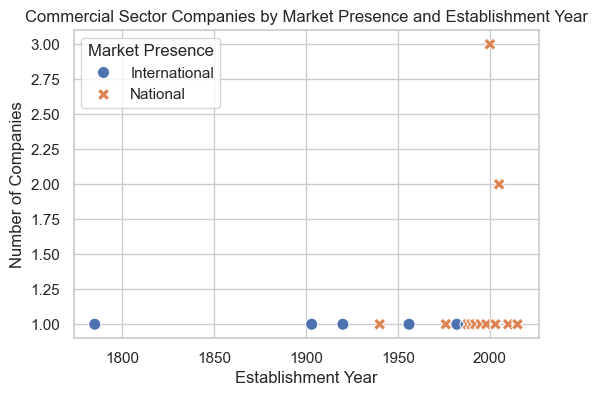

In [29]:
# Plotting the number of commercial sector companies by their market presence and establishment year

# Preparing the data for plotting
commercial_by_presence = priority_commercial_companies.groupby(['MARKET PRESENCE', 'EST. YEAR']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(6,4))
sns.scatterplot(data=commercial_by_presence, x='EST. YEAR', y='Count', hue='MARKET PRESENCE', style='MARKET PRESENCE', s=75)
plt.title('Commercial Sector Companies by Market Presence and Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Number of Companies')
plt.legend(title='Market Presence')
plt.grid(True)
plt.show()


## Frequency of Partnerships:

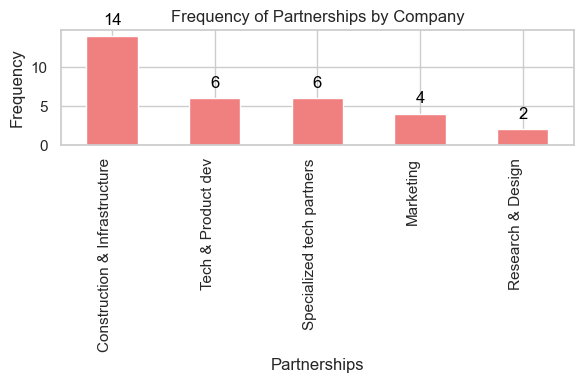

In [30]:
# Count the frequency of partnerships
partnerships_counts = data['PARTNERSHIPS'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(6,4))
partnerships_counts.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Partnerships by Company')
plt.xlabel('Partnerships')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')

# Add company names as annotations
for i, v in enumerate(partnerships_counts):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


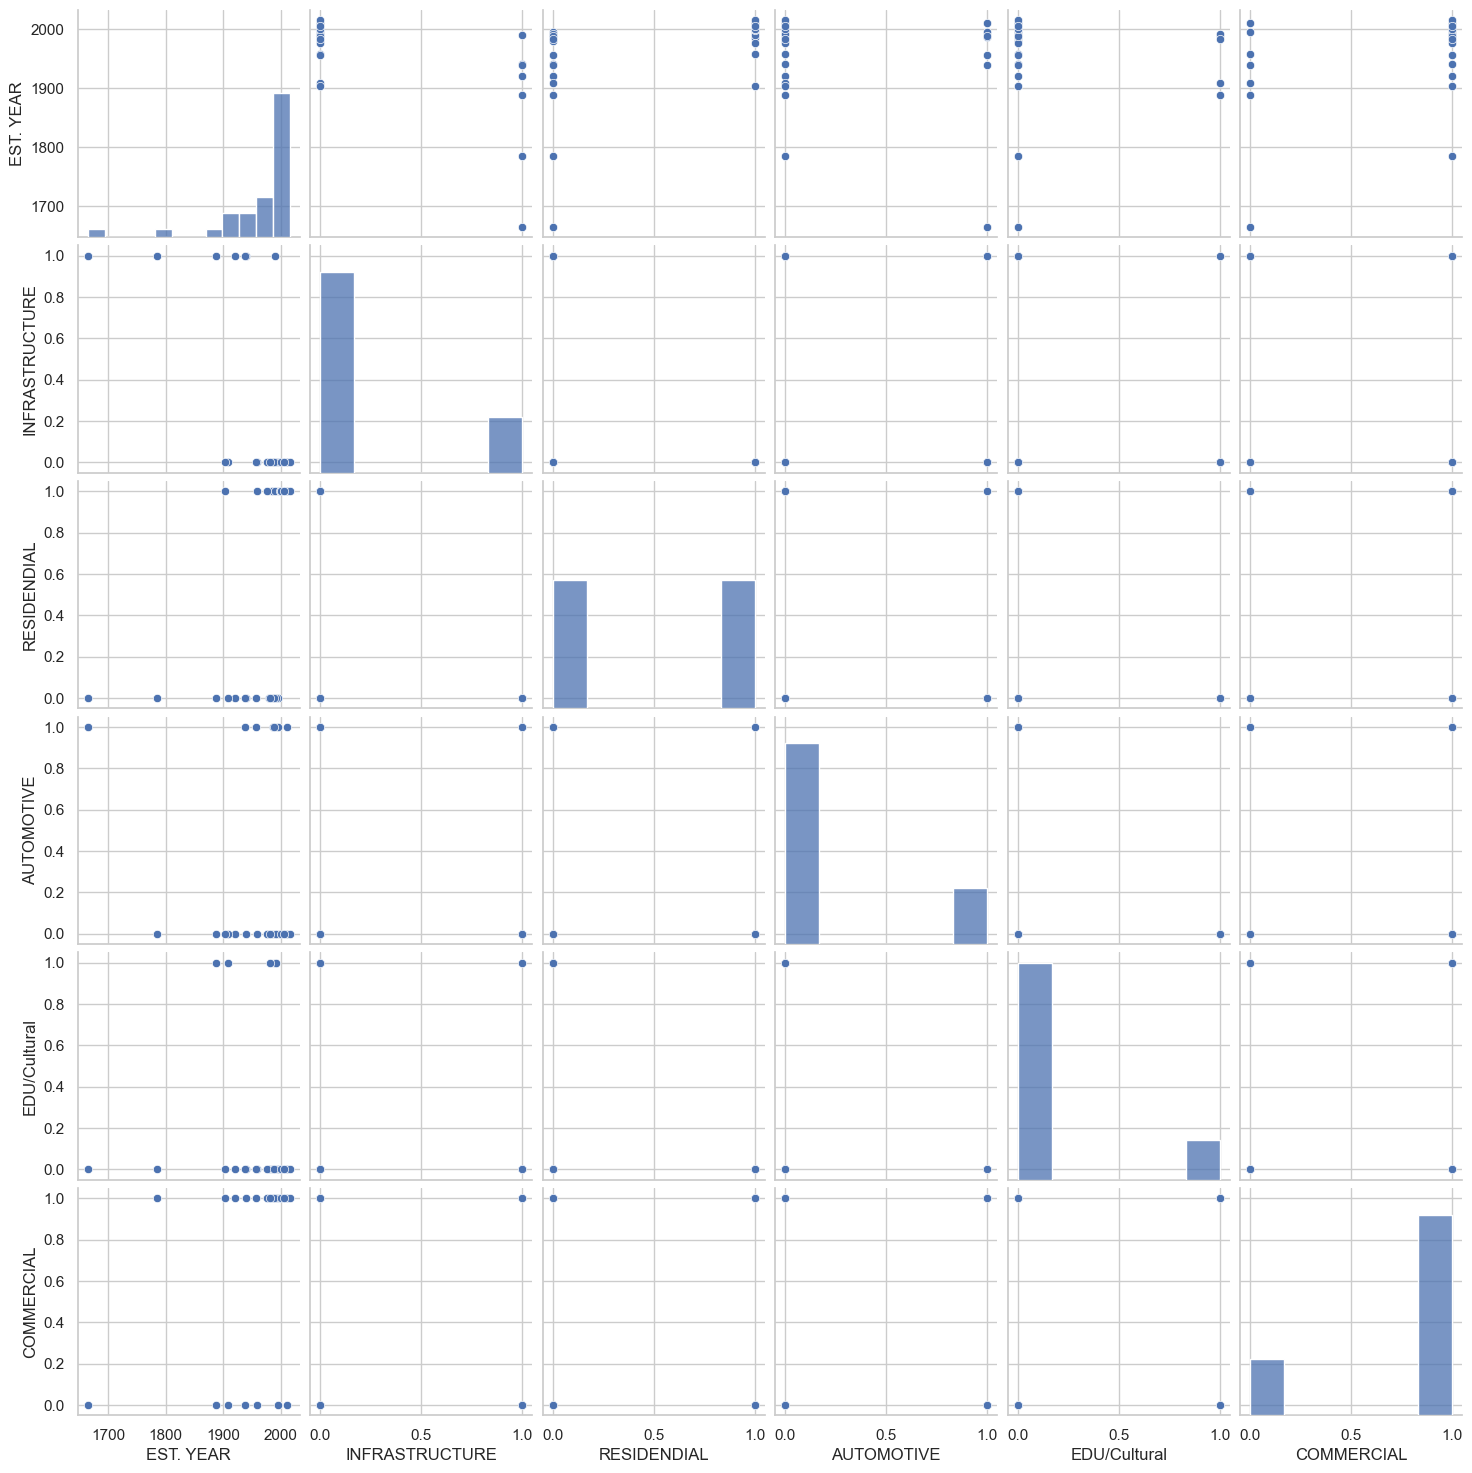

In [31]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for pairplot
numerical_data = data[['EST. YEAR', 'INFRASTRUCTURE', 'RESIDENDIAL', 'AUTOMOTIVE', 'EDU/Cultural', 'COMMERCIAL']]

# Creating pairplot
sns.pairplot(numerical_data)
plt.show()


## Conclusion:

Albotherm can capitalize on the diverse landscape of commercial building contractors, focusing on segments with high market presence and strategic partnerships. By aligning with companies engaged in energy-efficient solutions and sustainability initiatives, Albotherm can enhance its market penetration and establish itself as a leader in the commercial building sector.

## Based on the analysis and segmentation of Albotherm's market potential in commercial buildings, here are some suggestions and recommendations:

1. **Targeted Marketing and Partnerships:**
   - Identify and prioritize companies with national and international market presence, as they are likely to have a broader reach and influence.
   - make strategic partnerships with established players in the construction industry who share similar sustainability goals and values. Collaborating with these companies can amplify Albotherm's market impact and enhance brand credibility.

2. **Segment-Specific Campaigns:**
   - Tailor marketing campaigns and messaging based on segment analysis. For example, focus on the benefits of smart glass technology for Glass Facades, Office Windows, and Skylights, emphasizing energy savings, comfort, and environmental sustainability.
   - Highlight case studies and success stories of Albotherm implementations in commercial buildings to showcase real-world benefits and encourage adoption.

3. **Education and Training Programs:**
   - Offer educational seminars, workshops, and training programs targeted at architects, designers, and construction professionals. These programs can increase awareness about Albotherm's technology and its potential applications, driving demand and adoption in the commercial sector.

4. **Product Innovation and Customization:**
   - Invest in research and development to continuously improve Albotherm's smart glass coating technology, focusing on enhancing performance, durability, and cost-effectiveness.
   - Provide customization options to cater to the diverse needs and preferences of commercial building owners and developers. Offering tailored solutions can increase market competitiveness and customer satisfaction.

5. **Market Expansion and Diversification:**
   - Explore opportunities for market expansion beyond the UK to international markets with high demand for energy-efficient building solutions.
   - Diversify product offerings to address emerging trends and challenges in the commercial building sector, such as smart building integration, IoT connectivity, and advanced analytics for energy management.

6. **Customer Engagement and Feedback:**
   - Establish channels for ongoing communication and feedback from customers to gather insights and improve product offerings and service delivery.
   - Implement customer loyalty programs and incentives to reward repeat business and referrals, fostering long-term relationships and brand advocacy.

7. **Regulatory Compliance and Certification:**
   - Ensure compliance with relevant building codes, standards, and regulations governing energy efficiency and sustainability in commercial buildings.
   - Obtain certifications and endorsements from reputable organizations and industry bodies to validate the performance and reliability of Albotherm's technology.

By implementing these suggestions and recommendations, Albotherm can maximize its market potential in commercial buildings, drive adoption of its smart glass coating technology, and contribute to a more sustainable and energy-efficient built environment.